In [1]:
import pandas as pd 
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
#for logistic regression modeling
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
df_filt = pd.read_csv('2020_Competition_Training.csv')

In [4]:
df_filt.shape

(69572, 826)

In [5]:
zero_sum = df_filt.isin([0]).sum().sort_values(ascending=False).to_frame()
zero_sum.reset_index(inplace=True)

In [6]:
zero_sum.columns = ["col_names","sum_count"]

In [7]:
zero_columns = zero_sum[zero_sum.sum_count >= 69000].col_names.values

In [8]:
df = df_filt.loc[:,~df_filt.columns.isin(zero_columns)].copy()

In [9]:
df.shape

(69572, 573)

In [10]:
df.transportation_issues.value_counts()

0    59375
1    10197
Name: transportation_issues, dtype: int64

In [11]:
#categorical columns
cat_columns = df.select_dtypes(include="object")
df_cat = df[list(cat_columns)].copy()
df_cat.shape

(69572, 22)

In [12]:
#numerical columns
num_columns = df.select_dtypes(exclude="object")
df_num = df[list(num_columns)].copy()
df_num.shape

(69572, 551)

In [13]:
df_cat.head()

,person_id_syn,src_platform_cd,sex_cd,lang_spoken_cd,mabh_seg,cms_ra_factor_type_cd,cons_cmys,cons_hhcomp,cons_homstat,hedis_ami,hedis_cmc_ldc_c_control,hedis_cmc_ldc_c_screen,hedis_dia_eye,hedis_dia_hba1c_ge9,hedis_dia_hba1c_test,hedis_dia_ldc_c_control,hedis_dia_ldc_c_screen,hedis_dia_ma_nephr,rucc_category,zip_cd,cnty_cd,state_cd
0,0002MOb79ST17bLYAe46eIc2,EM,F,ENG,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,N,N,N,Y,1-Metro,other,other,other
1,0004cMOS6bTLf34Y7AIca8f3,EM,F,ENG,C2,CP,4,U,R,NaN,N,Y,Y,N,N,N,Y,N,2-Metro,other,other,other
2,000536M9O3ST98LaYaeA29Ia,EM,F,ENG,UNK,CN,6,C,R,NaN,NaN,NaN,Y,N,Y,Y,Y,Y,1-Metro,other,other,other
3,0009bMO9SfTLYe77A51I4ac3,EM,M,ENG,H6,CN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,Y,Y,Y,Y,7-Nonmetro,other,other,other
4,000M7OeS66bTL8bY89Aa16Ie,EM,M,ENG,UNK,CF,4,J,R,NaN,NaN,NaN,Y,N,N,Y,Y,Y,1-Metro,other,other,other


##### Auto-Visualizations

In [14]:
import pandas_profiling # library for automatic EDA
report = pandas_profiling.ProfileReport(df_cat)
#display(report)

In [15]:
removing_cat_columns = ['person_id_syn','hedis_cmc_ldc_c_screen','hedis_cmc_ldc_c_control','hedis_ami','cons_homstat','cons_cmys',
 'hedis_dia_eye','hedis_dia_hba1c_test','hedis_dia_hba1c_ge9',
 'cons_hhcomp','zip_cd', 'cnty_cd', 'state_cd']

In [16]:
df_cat_cln = df_cat.loc[:,~df_cat.columns.isin(removing_cat_columns)].copy()

In [17]:
import pandas_profiling # library for automatic EDA
report2 = pandas_profiling.ProfileReport(df_cat_cln)
#display(report2)

### Analysis on Numeric columns

In [18]:
df_num.isnull().sum().sort_values(ascending=False).to_frame().head(500)

,0
cons_n2029_y,19279
cons_ret_y,19279
cons_retail_buyer,19279
cons_veteran_y,19278
cons_hcaccprf_h,19278
cons_hcaccprf_p,19278
cons_n2mob,19278
cons_n2pbl,19278
cons_n2pmv,19278
cons_n65p_y,19278


In [19]:
num_column_list = df_num.columns

### Credit card columns

In [20]:
check = "credit" 
res_credit = list([idx for idx in num_column_list if idx[0:6].lower() == check.lower()]) 

In [21]:
df_credit = df_num[res_credit].copy()

In [22]:
df_credit[df_credit.isnull().any(axis=1)].head()

,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stmorg_30to59dpd,credit_num_nonagn1stmorg_60to89dpd,credit_num_nonagn1stmorg_90to119dp,credit_num_nonagn1stmorg_bankruptc,credit_num_nonagn1stmorg_collectio,credit_num_nonmtgcredit_60dpd,credit_num_studentloan,credit_num_studentloan_60dpd,credit_num_totalallcredit_collections,credit_num_totalallcredit_severederog,credit_prcnt_agencyfirstmtg,credit_prcnt_autobank,credit_prcnt_mtgcredit,credit_prcnt_nonagnfirstmtg
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [23]:
check = "cons" 
res_cons = list([idx for idx in num_column_list if idx[0:4].lower() == check.lower()]) 

In [24]:
df_cons = df_num[res_cons].copy()

In [25]:
## Calculating the count variables
check = "ct" 
res_ct = list([idx for idx in num_column_list if idx[-2:].lower() == check.lower()]) 
len(res_ct)

171

In [26]:
check = "ind" 
res_ind = list([idx for idx in num_column_list if idx[-3:].lower() == check.lower()]) 
len(res_ind)

228

In [27]:
#joining the column names of cons and variables ending with count
ct_cons_comb =  res_cons +  res_ct

In [28]:
#filtering the above mentioned columns from numeric data frame
df_num_cln = df_num.loc[:, ~df_num.columns.isin(ct_cons_comb)].copy()

In [29]:
df_num_cln.shape

(69572, 369)

In [30]:
#removing rows with maximum null values in it
#df_num_cln = df_num_flt.loc[(df_num_flt.isnull().sum(axis=1).sort_values(ascending =False) < 99),:].copy()

In [31]:
df_num_cln.shape

(69572, 369)

In [32]:
sorted(list(df_num_cln.columns))

['betos_d1c_ind',
 'betos_d1d_ind',
 'betos_m1b_ind',
 'betos_m2c_ind',
 'betos_m5b_ind',
 'betos_m5c_ind',
 'betos_m5d_ind',
 'betos_o1a_ind',
 'betos_o1b_ind',
 'betos_o1e_ind',
 'betos_o1g_ind',
 'betos_t1a_ind',
 'betos_t1b_ind',
 'betos_t1e_ind',
 'betos_t1h_ind',
 'betos_t2a_ind',
 'betos_y2_ind',
 'bh_adtp_ind',
 'bh_aoth_ind',
 'bh_bipr_ind',
 'bh_cdal_ind',
 'bh_cdsb_ind',
 'bh_cdto_ind',
 'bh_dema_ind',
 'cci_score',
 'ccsp_014_ind',
 'ccsp_020_ind',
 'ccsp_062_ind',
 'ccsp_130_ind',
 'ccsp_163_ind',
 'ccsp_169_ind',
 'ccsp_205_ind',
 'ccsp_220_ind',
 'ccsp_228_ind',
 'ccsp_236_ind',
 'ccsp_239_ind',
 'cms_disabled_ind',
 'cms_dual_eligible_ind',
 'cms_low_income_ind',
 'cms_ma_risk_score_nbr',
 'cms_partd_ra_factor_amt',
 'cms_risk_adj_payment_rate_a_amt',
 'cms_risk_adj_payment_rate_b_amt',
 'cms_risk_adjustment_factor_a_amt',
 'cms_rx_risk_score_nbr',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt',
 'cmsd2_can_unc_neo/plycyth/myelo_ind',
 'cmsd2_eye_blindness_ind'

In [33]:
##filtering the column names starting with specific charecter
betos_cln_columns = list(df_num_cln.filter(regex ="betos").columns)
bh_cln__columns = list(df_num_cln.filter(regex ="^bh_*").columns)
ccsp_cln__columns = list(df_num_cln.filter(regex ="^ccsp_").columns)
cms_cln__columns =list(df_num_cln.filter(regex ="^cms_").columns)
cmsd2_cln__columns = list(df_num_cln.filter(regex ="cmsd2_*").columns)
credit_cln__columns = list(df_num_cln.filter(regex ="^credit_").columns)
rx_cln__columns = list(df_num_cln.filter(regex ="^rx_").columns)
submcc_cln__columns = list(df_num_cln.filter(regex ="^submcc_").columns)

#### Checking corelation for betos columns

In [34]:
#transportation_issues
betos_cln_columns.append("transportation_issues")

In [35]:
bh_cln__columns.append("transportation_issues")

In [36]:
corr_betos = df_num_cln.loc[:,betos_cln_columns].corr()

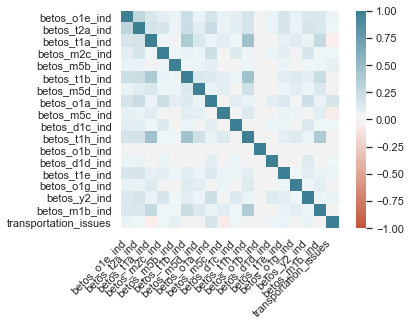

In [37]:
ax =sns.heatmap(corr_betos,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(    ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');

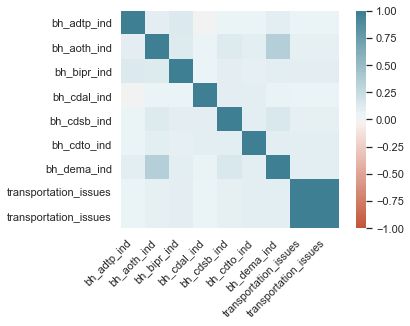

In [38]:
bh_cln__columns.append("transportation_issues")
corr_bh = df_num_cln.loc[:,bh_cln__columns].corr()
ax =sns.heatmap(corr_bh,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(    ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');

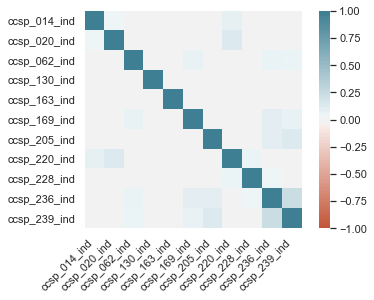

In [39]:
corr_ccsp = df_num_cln.loc[:,ccsp_cln__columns].corr()
ax =sns.heatmap(corr_ccsp,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

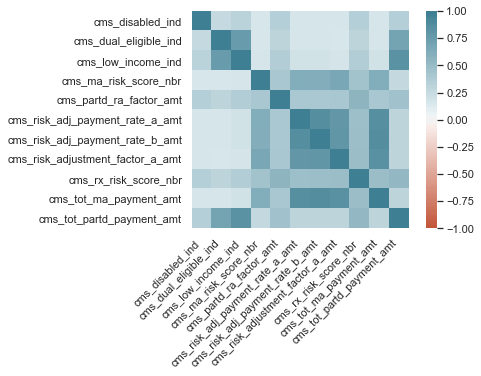

In [40]:
corr_cms = df_num_cln.loc[:,cms_cln__columns].corr()
ax =sns.heatmap(corr_cms,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [41]:
corr_matrix = corr_cms.abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['cms_risk_adj_payment_rate_b_amt',
 'cms_risk_adjustment_factor_a_amt',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt']

In [42]:
corr_matrix = corr_cms.abs()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
so

cms_tot_partd_payment_amt         cms_tot_partd_payment_amt           1.000000
cms_tot_ma_payment_amt            cms_tot_ma_payment_amt              1.000000
cms_dual_eligible_ind             cms_dual_eligible_ind               1.000000
cms_low_income_ind                cms_low_income_ind                  1.000000
cms_ma_risk_score_nbr             cms_ma_risk_score_nbr               1.000000
cms_partd_ra_factor_amt           cms_partd_ra_factor_amt             1.000000
cms_risk_adj_payment_rate_b_amt   cms_risk_adj_payment_rate_b_amt     1.000000
cms_risk_adjustment_factor_a_amt  cms_risk_adjustment_factor_a_amt    1.000000
cms_rx_risk_score_nbr             cms_rx_risk_score_nbr               1.000000
cms_risk_adj_payment_rate_a_amt   cms_risk_adj_payment_rate_a_amt     1.000000
cms_disabled_ind                  cms_disabled_ind                    1.000000
cms_tot_ma_payment_amt            cms_risk_adj_payment_rate_b_amt     0.881399
cms_risk_adj_payment_rate_b_amt   cms_tot_ma_payment

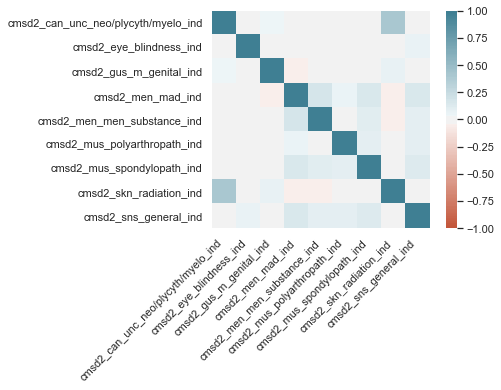

In [43]:
corr_cmsd2 = df_num_cln.loc[:,cmsd2_cln__columns].corr()
ax =sns.heatmap(corr_cmsd2,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(    ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');

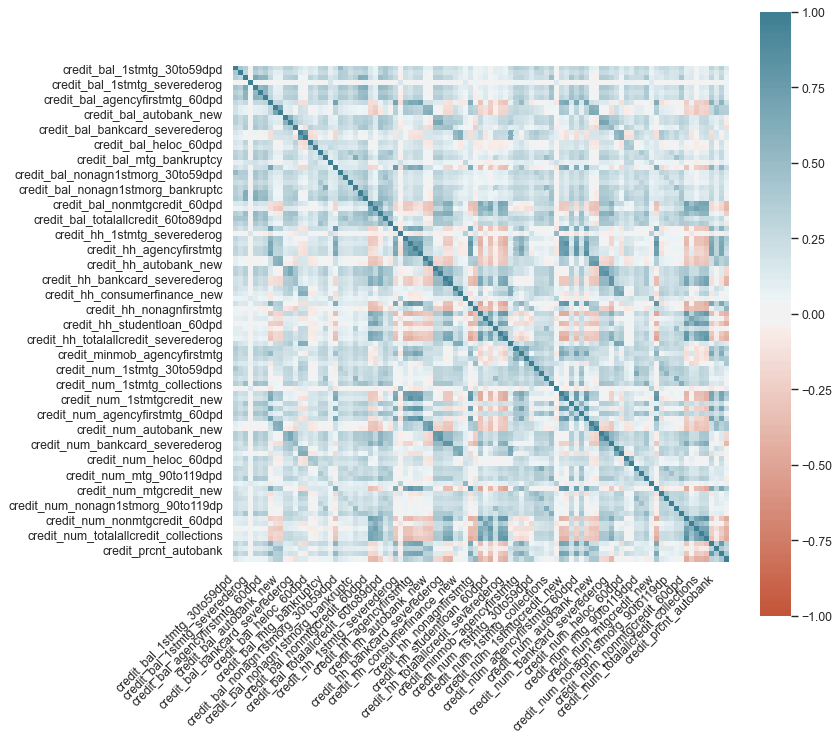

In [44]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
corr_credit = df_num_cln.loc[:,credit_cln__columns].corr()
ax =sns.heatmap(corr_credit,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(    ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');

In [45]:
corr_matrix = corr_credit.abs()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
so[99:250]

credit_hh_bankcard_severederog         credit_hh_bankcardcredit_60dpd           0.866904
credit_hh_bankcardcredit_60dpd         credit_hh_bankcard_severederog           0.866904
credit_num_nonmtgcredit_60dpd          credit_num_totalallcredit_severederog    0.866859
credit_num_totalallcredit_severederog  credit_num_nonmtgcredit_60dpd            0.866859
credit_num_agencyfirstmtg_new          credit_hh_agencyfirstmtg_new             0.858896
credit_hh_agencyfirstmtg_new           credit_num_agencyfirstmtg_new            0.858896
credit_num_1stmtgcredit_new            credit_hh_1stmtgcredit_new               0.853711
credit_hh_1stmtgcredit_new             credit_num_1stmtgcredit_new              0.853711
credit_num_autofinance_new             credit_hh_autofinance_new                0.836175
credit_hh_autofinance_new              credit_num_autofinance_new               0.836175
credit_num_1stmtgcredit_new            credit_num_mtgcredit_new                 0.819016
credit_num_mtgcredit_

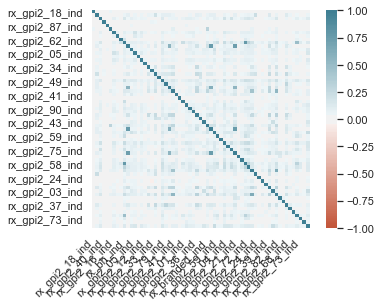

In [46]:
corr_rx = df_num_cln.loc[:,rx_cln__columns].corr()
ax =sns.heatmap(corr_rx,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(    ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');

In [47]:
corr_matrix = corr_rx.abs()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
so[62:200]

rx_gpi2_18_ind  rx_gpi2_18_ind    1.000000
rx_gpi2_58_ind  rx_bh_ind         0.778489
rx_bh_ind       rx_gpi2_58_ind    0.778489
rx_gpi2_97_ind  rx_gpi2_94_ind    0.765310
rx_gpi2_94_ind  rx_gpi2_97_ind    0.765310
rx_otc_ind      rx_gpi2_94_ind    0.753026
rx_gpi2_94_ind  rx_otc_ind        0.753026
rx_gpi2_97_ind  rx_otc_ind        0.748239
rx_otc_ind      rx_gpi2_97_ind    0.748239
rx_generic_ind  rx_maint_ind      0.642309
rx_maint_ind    rx_generic_ind    0.642309
rx_gpi2_94_ind  rx_gpi2_27_ind    0.599781
rx_gpi2_27_ind  rx_gpi2_94_ind    0.599781
                rx_gpi2_97_ind    0.573930
rx_gpi2_97_ind  rx_gpi2_27_ind    0.573930
rx_otc_ind      rx_gpi2_27_ind    0.552769
rx_gpi2_27_ind  rx_otc_ind        0.552769
rx_mail_ind     rx_maint_ind      0.539145
rx_maint_ind    rx_mail_ind       0.539145
rx_gpi2_57_ind  rx_bh_ind         0.488017
rx_bh_ind       rx_gpi2_57_ind    0.488017
rx_generic_ind  rx_mail_ind       0.439460
rx_mail_ind     rx_generic_ind    0.439460
rx_gpi2_39_

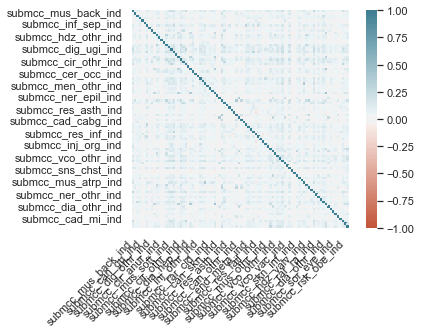

In [48]:
corr_submcc = df_num_cln.loc[:,submcc_cln__columns].corr()
ax =sns.heatmap(corr_submcc,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),  square=True)
ax.set_xticklabels(ax.get_xticklabels(),    rotation=45,    horizontalalignment='right');

In [49]:
corr_matrix = corr_submcc.abs()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
so[89:250]

submcc_mus_back_ind  submcc_mus_back_ind    1.000000
submcc_dia_othr_ind  submcc_dia_neu_ind     0.464394
submcc_dia_neu_ind   submcc_dia_othr_ind    0.464394
submcc_can_othr_ind  submcc_can_skn_ind     0.396979
submcc_can_skn_ind   submcc_can_othr_ind    0.396979
submcc_men_othr_ind  submcc_men_depr_ind    0.384067
submcc_men_depr_ind  submcc_men_othr_ind    0.384067
submcc_dia_nep_ind   submcc_dia_othr_ind    0.381027
submcc_dia_othr_ind  submcc_dia_nep_ind     0.381027
submcc_cad_ashd_ind  submcc_cad_isch_ind    0.380877
submcc_cad_isch_ind  submcc_cad_ashd_ind    0.380877
submcc_dia_nep_ind   submcc_dia_neu_ind     0.368785
submcc_dia_neu_ind   submcc_dia_nep_ind     0.368785
                     submcc_dia_pvd_ind     0.330147
submcc_dia_pvd_ind   submcc_dia_neu_ind     0.330147
submcc_cad_ptca_ind  submcc_cad_ashd_ind    0.325124
submcc_cad_ashd_ind  submcc_cad_ptca_ind    0.325124
submcc_dia_pvd_ind   submcc_dia_othr_ind    0.322317
submcc_dia_othr_ind  submcc_dia_pvd_ind     0.

##### Selecting the variables before removing corelated variables

In [50]:
numeric_columms = list(df_num_cln.columns)

In [51]:
df1 = df.copy()

In [52]:
df1.rucc_category.unique()

array(['1-Metro', '2-Metro', '7-Nonmetro', '6-Nonmetro', '4-Nonmetro',
       '8-Nonmetro', '3-Metro', '5-Nonmetro', '9-Nonmetro'], dtype=object)

In [53]:
df1.loc[df1.rucc_category.isin(['1-Metro', '2-Metro','3-Metro']),"rucc_category"] = "Metro"

In [54]:
df1.loc[~df1.rucc_category.isin(['1-Metro', '2-Metro','3-Metro']),"rucc_category"] = "NonMetro"

In [55]:
df_cat_cln.columns

Index(['src_platform_cd', 'sex_cd', 'lang_spoken_cd', 'mabh_seg', 'cms_ra_factor_type_cd', 'hedis_dia_ldc_c_control', 'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr', 'rucc_category'], dtype='object')

In [56]:
df1[["cms_ra_factor_type_cd"]] = df1[["cms_ra_factor_type_cd"]].apply(lambda x:x.fillna(x.value_counts().index[0]))
df1[["hedis_dia_ldc_c_control"]] = df1[["hedis_dia_ldc_c_control"]].apply(lambda x:x.fillna(x.value_counts().index[0]))
df1[["hedis_dia_ldc_c_screen"]] = df1[["hedis_dia_ldc_c_screen"]].apply(lambda x:x.fillna(x.value_counts().index[0]))
df1[["hedis_dia_ma_nephr"]] = df1[["hedis_dia_ma_nephr"]].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [57]:
df1_cat_dummies = pd.get_dummies(df1[list(df_cat_cln.columns)])

In [58]:
df1_cat_dummies.shape

(69572, 39)

In [59]:
num_col_list = list(df_num_cln.columns)
#num_col_list.append("transportation_issues")

In [60]:
df_aft1 = pd.concat([df1_cat_dummies,df1[num_col_list]], axis=1)

#### Machine Learning -- before removing co-related variables

In [61]:
df_aft1.shape

(69572, 408)

In [62]:
for var_name in list(df_aft1.columns[df_aft1.isna().any()]):
    df_aft1[[var_name]] = df_aft1[[var_name]].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [63]:
df_aft1_col_list = list(df_aft1.columns)

In [64]:
check_credit = "credit" 
aft1_credit = list([idx for idx in df_aft1_col_list if idx[0:6].lower() == check_credit.lower()]) 

In [65]:
#converting the credit variables to MinMax scaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_aft1_scale = min_max_scaler.fit_transform(df_aft1)

In [67]:
df_aft1_scale = pd.DataFrame(df_aft1_scale, columns =list(df_aft1.columns) )

In [68]:
df_aft1_scale.head()

,src_platform_cd_EM,src_platform_cd_LV,sex_cd_F,sex_cd_M,lang_spoken_cd_E,lang_spoken_cd_ENG,lang_spoken_cd_SPA,mabh_seg_C1,mabh_seg_C2,mabh_seg_C3,mabh_seg_C4,mabh_seg_C5,mabh_seg_C6,mabh_seg_C7,mabh_seg_H1,mabh_seg_H2,mabh_seg_H3,mabh_seg_H4,mabh_seg_H5,mabh_seg_H6,mabh_seg_H7,mabh_seg_H8,mabh_seg_UNK,cms_ra_factor_type_cd_*,cms_ra_factor_type_cd_C2,cms_ra_factor_type_cd_CF,cms_ra_factor_type_cd_CN,cms_ra_factor_type_cd_CP,cms_ra_factor_type_cd_D,cms_ra_factor_type_cd_E,cms_ra_factor_type_cd_I,cms_ra_factor_type_cd_SE,hedis_dia_ldc_c_control_N,hedis_dia_ldc_c_control_Y,hedis_dia_ldc_c_screen_N,hedis_dia_ldc_c_screen_Y,hedis_dia_ma_nephr_N,hedis_dia_ma_nephr_Y,rucc_category_NonMetro,transportation_issues,est_age,smoker_current_ind,smoker_former_ind,cci_score,dcsi_score,fci_score,hcc_weighted_sum,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_062_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_205_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stmorg_30to59dpd,credit_num_nona

In [69]:
#independent and dependent variables
X = df_aft1_scale.drop(['transportation_issues'], axis=1)
Y = df_aft1_scale['transportation_issues']

In [70]:
Y

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
69567    0.0
69568    0.0
69569    0.0
69570    0.0
69571    1.0
Name: transportation_issues, Length: 69572, dtype: float64

In [71]:
#dividing the dataset into training and validation
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [72]:
X.head(5)

,src_platform_cd_EM,src_platform_cd_LV,sex_cd_F,sex_cd_M,lang_spoken_cd_E,lang_spoken_cd_ENG,lang_spoken_cd_SPA,mabh_seg_C1,mabh_seg_C2,mabh_seg_C3,mabh_seg_C4,mabh_seg_C5,mabh_seg_C6,mabh_seg_C7,mabh_seg_H1,mabh_seg_H2,mabh_seg_H3,mabh_seg_H4,mabh_seg_H5,mabh_seg_H6,mabh_seg_H7,mabh_seg_H8,mabh_seg_UNK,cms_ra_factor_type_cd_*,cms_ra_factor_type_cd_C2,cms_ra_factor_type_cd_CF,cms_ra_factor_type_cd_CN,cms_ra_factor_type_cd_CP,cms_ra_factor_type_cd_D,cms_ra_factor_type_cd_E,cms_ra_factor_type_cd_I,cms_ra_factor_type_cd_SE,hedis_dia_ldc_c_control_N,hedis_dia_ldc_c_control_Y,hedis_dia_ldc_c_screen_N,hedis_dia_ldc_c_screen_Y,hedis_dia_ma_nephr_N,hedis_dia_ma_nephr_Y,rucc_category_NonMetro,est_age,smoker_current_ind,smoker_former_ind,cci_score,dcsi_score,fci_score,hcc_weighted_sum,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_062_ind,ccsp_130_ind,ccsp_163_ind,ccsp_169_ind,ccsp_205_ind,ccsp_220_ind,ccsp_228_ind,ccsp_236_ind,ccsp_239_ind,cms_disabled_ind,cms_dual_eligible_ind,cms_low_income_ind,cms_ma_risk_score_nbr,cms_partd_ra_factor_amt,cms_risk_adj_payment_rate_a_amt,cms_risk_adj_payment_rate_b_amt,cms_risk_adjustment_factor_a_amt,cms_rx_risk_score_nbr,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cmsd2_can_unc_neo/plycyth/myelo_ind,cmsd2_eye_blindness_ind,cmsd2_gus_m_genital_ind,cmsd2_men_mad_ind,cmsd2_men_men_substance_ind,cmsd2_mus_polyarthropath_ind,cmsd2_mus_spondylopath_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,credit_bal_1stmtg_30to59dpd,credit_bal_1stmtg_60to89dpd,credit_bal_1stmtg_collections,credit_bal_1stmtg_severederog,credit_bal_1stmtgcredit_60dpd,credit_bal_agency1stmorg_collectio,credit_bal_agencyfirstmtg_60dpd,credit_bal_agencyfirstmtg_new,credit_bal_autobank,credit_bal_autobank_new,credit_bal_autofinance,credit_bal_autofinance_new,credit_bal_bankcard_severederog,credit_bal_consumerfinance,credit_bal_consumerfinance_new,credit_bal_heloc_60dpd,credit_bal_heloc_severederog,credit_bal_mtg_90to119dpd,credit_bal_mtg_bankruptcy,credit_bal_mtg_severederog,credit_bal_mtgcredit_new,credit_bal_nonagn1stmorg_30to59dpd,credit_bal_nonagn1stmorg_60to89dpd,credit_bal_nonagn1stmorg_90to119dp,credit_bal_nonagn1stmorg_bankruptc,credit_bal_nonagn1stmorg_collectio,credit_bal_nonagnfirstmtg_60dpd,credit_bal_nonmtgcredit_60dpd,credit_bal_studentloan_60dpd,credit_bal_totalallcredit_60dpd,credit_bal_totalallcredit_60to89dpd,credit_bal_totalallcredit_90to119dpd,credit_bal_totalallcredit_new,credit_hh_1stmtg_severederog,credit_hh_1stmtgcredit,credit_hh_1stmtgcredit_new,credit_hh_agencyfirstmtg,credit_hh_agencyfirstmtg_new,credit_hh_autobank,credit_hh_autobank_new,credit_hh_autofinance,credit_hh_autofinance_new,credit_hh_bankcard_severederog,credit_hh_bankcardcredit_60dpd,credit_hh_consumerfinance,credit_hh_consumerfinance_new,credit_hh_mtg_severederog,credit_hh_mtgcredit_new,credit_hh_nonagnfirstmtg,credit_hh_nonmtgcredit_60dpd,credit_hh_studentloan,credit_hh_studentloan_60dpd,credit_hh_totalallcredit_bankruptcy,credit_hh_totalallcredit_collections,credit_hh_totalallcredit_severederog,credit_highcrd_consumerfinance_new,credit_minmob_1stmtgcredit,credit_minmob_agencyfirstmtg,credit_minmob_mtgcredit,credit_minmob_nonagn,credit_num_1stmtg_30to59dpd,credit_num_1stmtg_60to89dpd,credit_num_1stmtg_bankruptcy,credit_num_1stmtg_collections,credit_num_1stmtg_severederog,credit_num_1stmtgcredit,credit_num_1stmtgcredit_new,credit_num_agency1stmorg_collectio,credit_num_agencyfirstmtg,credit_num_agencyfirstmtg_60dpd,credit_num_agencyfirstmtg_new,credit_num_autobank,credit_num_autobank_new,credit_num_autofinance,credit_num_autofinance_new,credit_num_bankcard_severederog,credit_num_consumerfinance,credit_num_consumerfinance_new,credit_num_heloc_60dpd,credit_num_heloc_severederog,credit_num_mtg_60to89dpd,credit_num_mtg_90to119dpd,credit_num_mtg_collections,credit_num_mtg_severederog,credit_num_mtgcredit_new,credit_num_nonagn1stmorg_30to59dpd,credit_num_nonagn1stmorg_60to89dpd,cr

#### Applying the algorithms

In [73]:
tree2 = DecisionTreeClassifier()
tree2 = tree2.fit(x_train,y_train)
y_pred = tree2.predict(x_test)
print("Accuracy")
print(metrics.accuracy_score(y_test, y_pred))
print("\nConfusion-matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification-report")
print(metrics.classification_report(y_test, y_pred))

Accuracy
0.7641337677270985

Confusion-matrix
[[15157  2597]
 [ 2326   792]]

classification-report
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     17754
         1.0       0.23      0.25      0.24      3118

    accuracy                           0.76     20872
   macro avg       0.55      0.55      0.55     20872
weighted avg       0.77      0.76      0.77     20872



In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Accuracy")
print(metrics.accuracy_score(y_test, y_pred))
print("\nConfusion-matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification-report")
print(metrics.classification_report(y_test, y_pred))

LogisticRegression()

Accuracy
0.8528171713300114

Confusion-matrix
[[17475   279]
 [ 2793   325]]

classification-report
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     17754
         1.0       0.54      0.10      0.17      3118

    accuracy                           0.85     20872
   macro avg       0.70      0.54      0.55     20872
weighted avg       0.81      0.85      0.81     20872



##### Testing individuala category variables

In [75]:
##filtering the column names starting with specific charecter
betos_cln_columns = list(df_num_cln.filter(regex ="betos").columns)
bh_cln__columns = list(df_num_cln.filter(regex ="^bh_*").columns)
ccsp_cln__columns = list(df_num_cln.filter(regex ="^ccsp_").columns)
cms_cln__columns =list(df_num_cln.filter(regex ="^cms_").columns)
cmsd2_cln__columns = list(df_num_cln.filter(regex ="cmsd2_*").columns)
credit_cln__columns = list(df_num_cln.filter(regex ="^credit_").columns)
rx_cln__columns = list(df_num_cln.filter(regex ="^rx_").columns)
submcc_cln__columns = list(df_num_cln.filter(regex ="^submcc_").columns)

In [76]:
#independent and dependent variables
X = df_aft1_scale[betos_cln_columns]
Y = df_aft1_scale['transportation_issues']

In [77]:
Y

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
69567    0.0
69568    0.0
69569    0.0
69570    0.0
69571    1.0
Name: transportation_issues, Length: 69572, dtype: float64

In [78]:
#dividing the dataset into training and validation
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [79]:
tree2 = DecisionTreeClassifier()
tree2 = tree2.fit(x_train,y_train)
y_pred = tree2.predict(x_test)
print("Accuracy")
print(metrics.accuracy_score(y_test, y_pred))
print("\nConfusion-matrix")
print(confusion_matrix(y_test, y_pred))
print("\nclassification-report")
print(metrics.classification_report(y_test, y_pred))

Accuracy
0.8429474894595631

Confusion-matrix
[[17426   328]
 [ 2950   168]]

classification-report
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     17754
         1.0       0.34      0.05      0.09      3118

    accuracy                           0.84     20872
   macro avg       0.60      0.52      0.50     20872
weighted avg       0.78      0.84      0.79     20872



In [80]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(100,), random_state=1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)